# Multiple Data Source Merged Result


In [1]:
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display, display_markdown

#
# Hide the plotbox if case miss any one data source
#
HIDE_MISSING_CASE = False

#
# Input data source
#
INPUT_SOURCE = [
    {
        'label': 'ESR45',
        'filename': '/Users/Askeing/software/Hasal/temp/ESR/ESR45_20170825.json'
    },
    {
        'label': 'ESR52',
        'filename': '/Users/Askeing/software/Hasal/temp/ESR/ESR52_20170825.json'
    },
    {
        'label': 'Nightly_20170828',
        'filename': '/Users/Askeing/software/Hasal/temp/ESR/Nightly_20170828.json'
    }
]

#
# Data structure:
# {
#  "casename_foo": {
#    "time_list": [{"run_time": 1.1}, {"run_time": 1.1}, ...]
#  },
#  "casename_bar": {
#    "time_list": [{"run_time": 1.1}, {"run_time": 1.1}, ...]
#  },
#  ...
# }
#
DATA_LIST = 'time_list'
DATA_NAME = 'run_time'

#
# Definde layout and figure size
#
layout_row = 1
layout_column = 1
fig_size_w = 10
fig_size_h = 5
matplotlib.rcParams.update({'figure.max_open_warning': 0})

#
# Read data
#
data_dict = {}
for source in INPUT_SOURCE:
    label = source.get('label')
    filename = source.get('filename')

    with open(filename) as f:
        data = json.load(f)
    remove_data = ["video-recording-fps"]
    for item in remove_data:
        if item in data:
            del data[item]
    data_dict[label] = data

#
# generate merged data
#
casename_list = list(set([casename for lable, data in data_dict.items() for casename in data.keys()]))

case_result = []
for casename in casename_list:
    result = {
        "casename": casename,
        "result": {}
    }
    for lable, data in data_dict.items():
        result["result"][lable] = {}
    
    for lable, data in data_dict.items():
        if data.get(casename):
            result["result"][lable][DATA_LIST] = data.get(casename).get(DATA_LIST)
        else:
            result["result"][lable][DATA_LIST] = []
    case_result.append(result)

#
# show original data of each cases
#
display_markdown('## Merged Result', raw=True)
display_markdown('Report Generate Time: {}'.format(datetime.now().strftime('%Y-%m-%d %H:%M:%S')), raw=True)
display_markdown('{} Cases'.format(len(case_result)), raw=True)
for case in sorted(case_result):
    casename = case.get('casename')
    result = case.get('result')
    d = pd.DataFrame(result)
    
    # drop empty 'DATA_LIST'
    for c in d:
        if (d[c][DATA_LIST] == []) :
            d.drop(c, axis=1, inplace=True)

    # Retrive the value of 'DATA_NAME' from each run
    value = pd.DataFrame([pd.DataFrame(d[c][DATA_LIST])[DATA_NAME] for c in d]).T
    value.columns = d.columns
    # Plot input latency boxplot
    value_min = min(value.min())
    value_max = max(value.max())
    
    # When HIDE_MISSING_CASE is enabled, skip the case if the case data less then input data amount.
    if HIDE_MISSING_CASE and len(INPUT_SOURCE) > len(value.T):
        # display summary
        display_markdown('### {}\nskip draw plot box'.format(casename), raw=True)
        display(value.describe())
    else:
        # draw plot into memory
        value.plot.box(subplots=False,
                       layout=(layout_row, layout_column),
                       sharey=True, sharex=True, figsize=(fig_size_w, fig_size_h),
                       ylim=(0, value_max + 100))
        plt.title(casename)
        
        # display summary
        display_markdown('### {}'.format(casename), raw=True)
        display(value.describe())

## Merged Result

Report Generate Time: 2017-08-31 17:51:01

21 Cases

### test_firefox_amazon_ail_hover_related_product_thumbnail

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,433.333333,451.851852,407.406667
std,27.216553,25.978782,18.142554
min,400.000000,422.222222,400.000000
25%,422.222222,436.111111,400.000000
50%,422.222222,444.444444,400.000000
75%,455.555556,469.444444,400.000000
max,466.666667,488.888889,444.440000


### test_firefox_amazon_ail_select_search_suggestion

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,29.629630,40.740741,18.516667
std,5.737753,9.072184,9.071277
min,22.222222,33.333333,11.110000
25%,25.000000,33.333333,11.110000
50%,33.333333,38.888889,16.665000
75%,33.333333,44.444444,22.220000
max,33.333333,55.555556,33.330000


### test_firefox_amazon_ail_type_in_search_field

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,14.814815,27.777778,18.516667
std,8.364141,9.296223,9.071277
min,5.555556,11.111111,11.110000
25%,6.944444,25.000000,11.110000
50%,16.666667,33.333333,16.665000
75%,22.222222,33.333333,22.220000
max,22.222222,33.333333,33.330000


### test_firefox_facebook_ail_click_close_chat_tab

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,85.185185,68.518519,53.703333
std,9.072184,14.768446,14.772236
min,66.666667,44.444444,33.330000
25%,88.888889,66.666667,44.440000
50%,88.888889,66.666667,55.555000
75%,88.888889,75.000000,66.670000
max,88.888889,88.888889,66.670000


### test_firefox_facebook_ail_click_open_chat_tab

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,61.111111,62.962963,51.853333
std,9.296223,18.144368,11.478877
min,44.444444,44.444444,33.330000
25%,58.333333,47.222222,47.220000
50%,66.666667,61.111111,55.560000
75%,66.666667,75.000000,55.560000
max,66.666667,88.888889,66.670000


### test_firefox_facebook_ail_click_open_chat_tab_emoji

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,72.222222,90.740741,46.296667
std,13.608276,10.924356,10.928350
min,66.666667,77.777778,33.330000
25%,66.666667,80.555556,36.107500
50%,66.666667,94.444444,50.000000
75%,66.666667,100.000000,55.560000
max,100.000000,100.000000,55.560000


### test_firefox_facebook_ail_click_photo_viewer_right_arrow

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,62.962963,72.222222,70.373333
std,9.072184,9.296223,5.737179
min,44.444444,66.666667,66.670000
25%,66.666667,66.666667,66.670000
50%,66.666667,66.666667,66.670000
75%,66.666667,75.000000,75.002500
max,66.666667,88.888889,77.780000


### test_firefox_facebook_ail_scroll_home_1_txt

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,51.851852,37.037037,44.443333
std,5.737753,9.072184,9.941559
min,44.444444,33.333333,33.330000
25%,47.222222,33.333333,36.107500
50%,55.555556,33.333333,44.440000
75%,55.555556,33.333333,52.780000
max,55.555556,55.555556,55.560000


### test_firefox_facebook_ail_type_comment_1_txt

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,31.481481,42.592593,20.368333
std,4.536092,8.364141,8.363304
min,22.222222,33.333333,11.110000
25%,33.333333,36.111111,13.887500
50%,33.333333,44.444444,22.220000
75%,33.333333,44.444444,22.220000
max,33.333333,55.555556,33.330000


### test_firefox_facebook_ail_type_composerbox_1_txt

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,81.481481,59.259259,48.146667
std,25.010286,13.456224,15.184029
min,33.333333,33.333333,33.330000
25%,80.555556,58.333333,36.107500
50%,88.888889,66.666667,44.440000
75%,97.222222,66.666667,61.112500
max,100.000000,66.666667,66.670000


### test_firefox_facebook_ail_type_message_1_txt

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,29.629630,24.074074,27.778333
std,5.737753,8.364141,21.945556
min,22.222222,11.111111,11.110000
25%,25.000000,22.222222,11.110000
50%,33.333333,22.222222,16.665000
75%,33.333333,30.555556,47.225000
max,33.333333,33.333333,55.560000


### test_firefox_gdoc_ail_pagedown_10_text

,Nightly_20170828
count,6.000000
mean,25.923333
std,9.071277
min,11.110000
25%,22.220000
50%,27.775000
75%,33.330000
max,33.330000


### test_firefox_gmail_ail_compose_new_mail_via_keyboard

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,248.148148,244.444444,214.813333
std,40.774397,28.109135,16.726608
min,200.000000,222.222222,188.890000
25%,233.333333,233.333333,205.555000
50%,238.888889,233.333333,222.220000
75%,252.777778,241.666667,222.220000
max,322.222222,300.000000,233.330000


### test_firefox_gmail_ail_open_mail

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,207.407407,296.296296,270.370000
std,21.848713,106.959475,98.045047
min,177.777778,211.111111,177.780000
25%,200.000000,225.000000,191.667500
50%,200.000000,238.888889,250.000000
75%,225.000000,377.777778,324.997500
max,233.333333,444.444444,422.220000


### test_firefox_gmail_ail_reply_mail

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,220.370370,262.962963,238.888333
std,12.989391,18.144368,19.565717
min,200.000000,244.444444,211.110000
25%,213.888889,247.222222,233.330000
50%,222.222222,261.111111,233.330000
75%,230.555556,275.000000,250.002500
max,233.333333,288.888889,266.670000


### test_firefox_gmail_ail_type_in_reply_field

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,38.888889,24.074074,35.183333
std,9.296223,8.364141,10.926993
min,33.333333,11.111111,22.220000
25%,33.333333,22.222222,33.330000
50%,33.333333,22.222222,33.330000
75%,41.666667,30.555556,33.330000
max,55.555556,33.333333,55.560000


### test_firefox_gsearch_ail_select_image_cat

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,88.888889,87.037037,79.631667
std,12.171612,8.364141,10.923264
min,77.777778,77.777778,66.670000
25%,77.777778,80.555556,77.780000
50%,88.888889,88.888889,77.780000
75%,100.000000,88.888889,77.780000
max,100.000000,100.000000,100.000000


### test_firefox_gsearch_ail_select_search_suggestion

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,20.370370,37.037037,28.703333
std,8.364141,21.848713,26.855152
min,11.111111,11.111111,5.560000
25%,13.888889,33.333333,11.110000
50%,22.222222,33.333333,22.220000
75%,22.222222,33.333333,33.330000
max,33.333333,77.777778,77.780000


### test_firefox_gsearch_ail_type_searchbox

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,103.703704,74.074074,16.665000
std,62.327952,26.912448,6.085198
min,11.111111,33.333333,11.110000
25%,75.000000,61.111111,11.110000
50%,100.000000,77.777778,16.665000
75%,150.000000,86.111111,22.220000
max,177.777778,111.111111,22.220000


### test_firefox_youtube_ail_select_search_suggestion

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,48.148148,18.518519,19.443333
std,41.968046,9.072184,12.041800
min,22.222222,11.111111,5.560000
25%,33.333333,11.111111,11.110000
50%,33.333333,16.666667,16.665000
75%,33.333333,22.222222,30.552500
max,133.333333,33.333333,33.330000


### test_firefox_youtube_ail_type_in_search_field

,ESR45,ESR52,Nightly_20170828
count,6.000000,6.000000,6.000000
mean,18.518519,16.666667,12.963333
std,9.072184,9.296223,7.587623
min,11.111111,11.111111,5.560000
25%,11.111111,11.111111,6.947500
50%,16.666667,11.111111,11.110000
75%,22.222222,19.444444,19.442500
max,33.333333,33.333333,22.220000


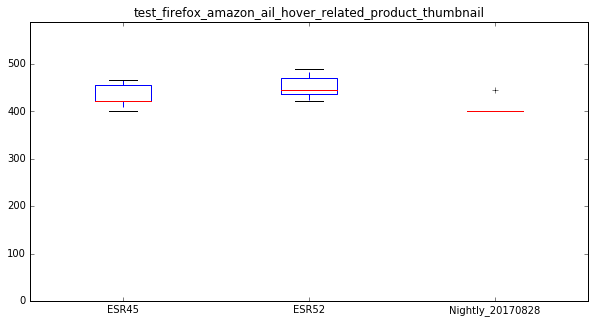

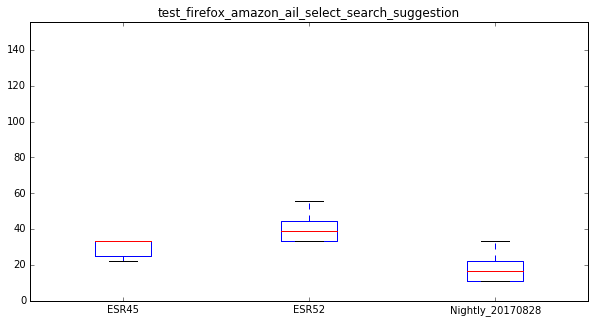

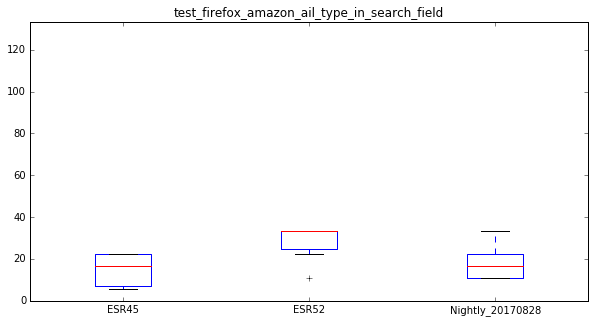

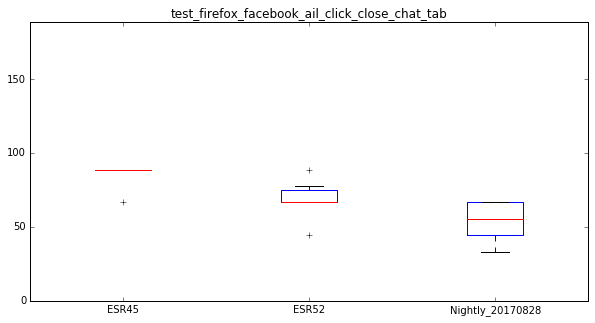

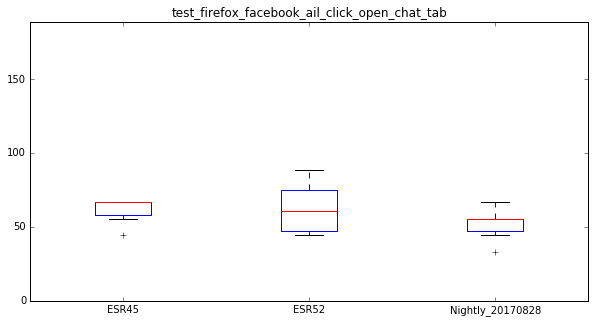

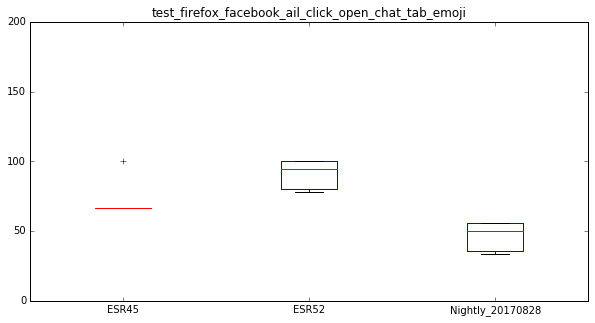

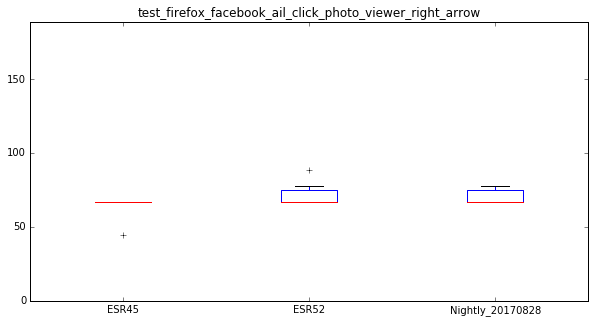

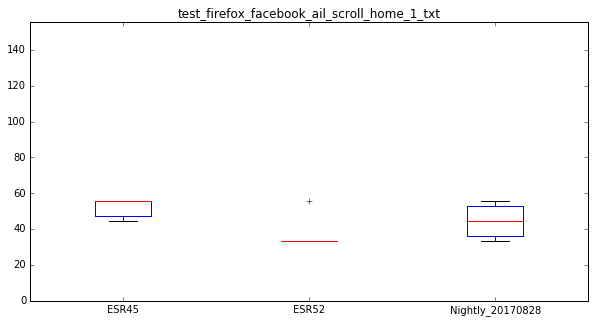

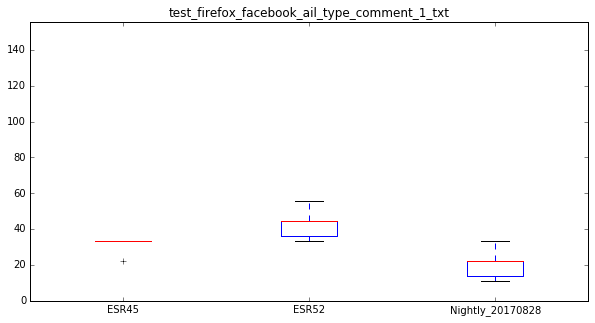

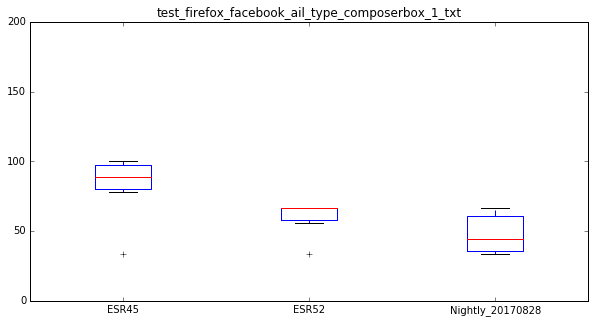

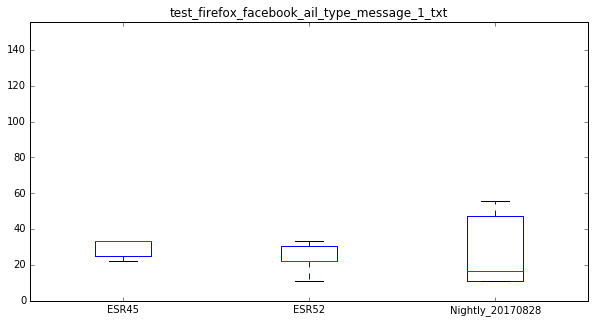

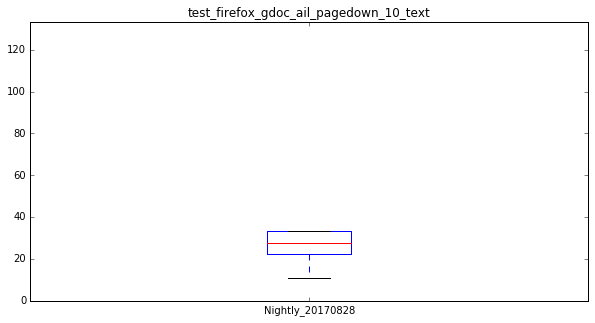

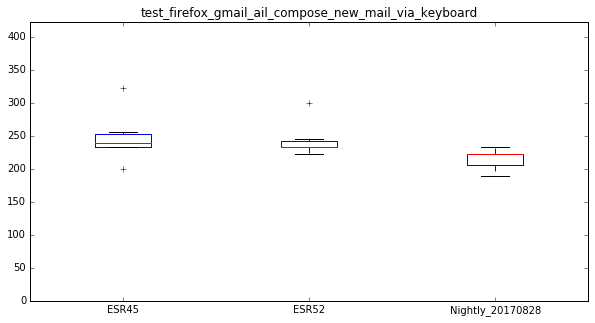

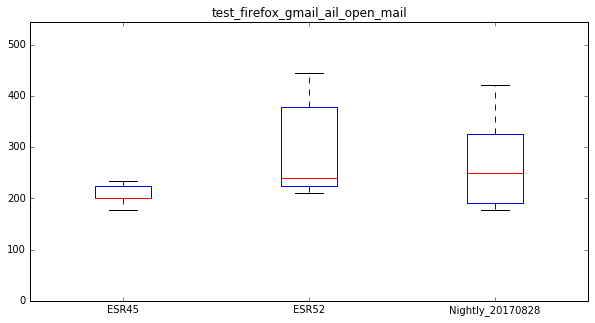

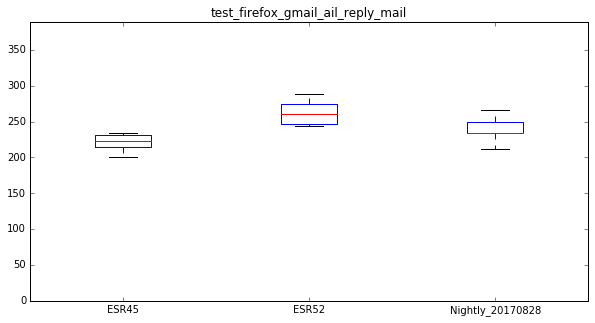

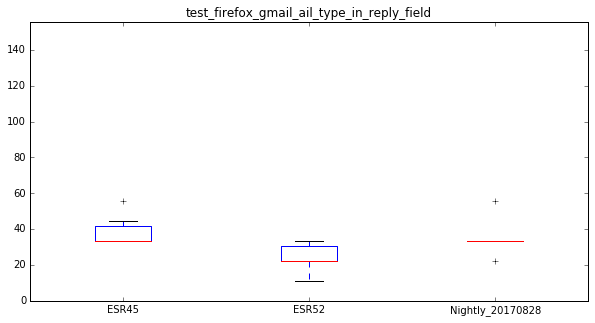

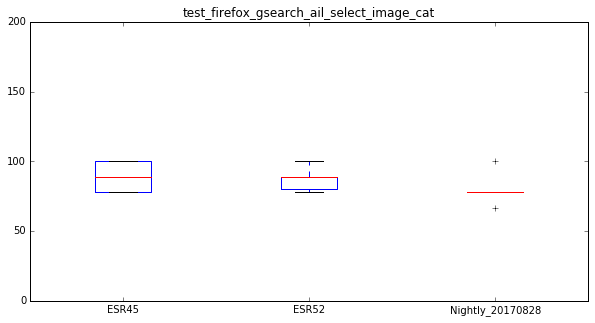

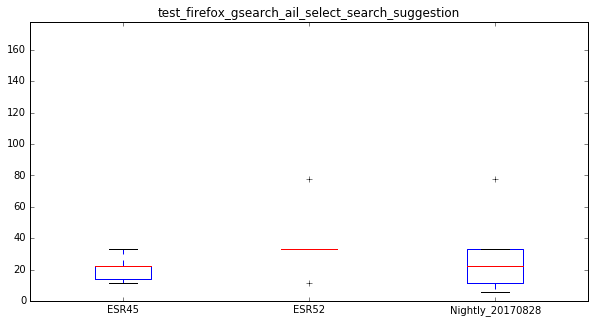

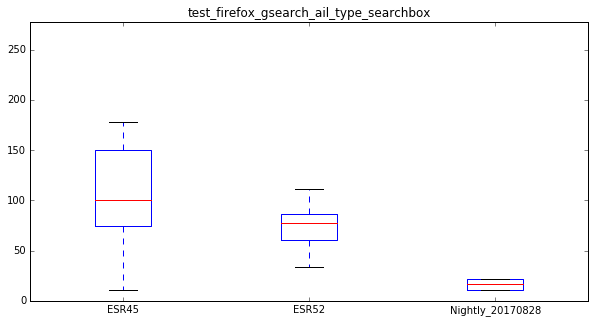

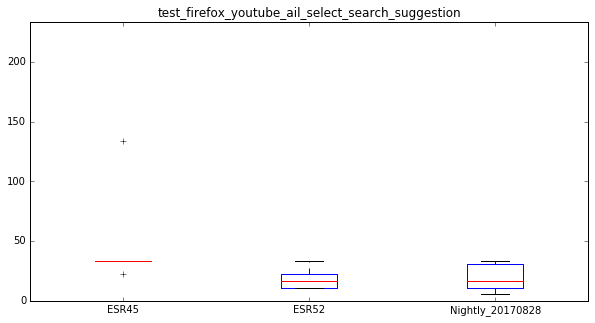

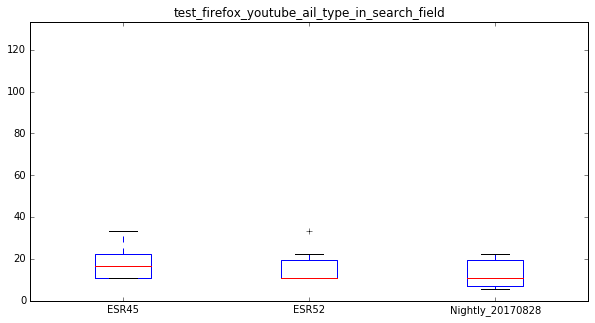

In [2]:
# show plot
plt.show()